# **Import Library**

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# **Memuat Dataset Dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Import file hasil Clustering dari Gdrive
df = pd.read_csv('/content/sample_data/best_model_clustering.csv')

# Merubah feature label Cluster menjadi Target pada kolom Cluster
df.rename(columns={'Cluster': 'Target'}, inplace=True)

# Pastikan kolom Cluster sudah berubah menjadi Target
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,1.0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,1.0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2.0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2.0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,NaN


In [3]:
# Melihat struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2285 non-null   object 
 1   AccountID                2290 non-null   object 
 2   TransactionAmount        2286 non-null   float64
 3   TransactionDate          2283 non-null   object 
 4   TransactionType          2279 non-null   object 
 5   Location                 2281 non-null   object 
 6   DeviceID                 2282 non-null   object 
 7   IP Address               2291 non-null   object 
 8   MerchantID               2289 non-null   object 
 9   Channel                  2285 non-null   object 
 10  CustomerAge              2292 non-null   float64
 11  CustomerOccupation       2289 non-null   object 
 12  TransactionDuration      2287 non-null   float64
 13  LoginAttempts            2289 non-null   float64
 14  AccountBalance          

In [4]:
# Statistik deskriptif data numerik
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Target
count,2286.000000,2292.000000,2287.000000,2289.0,2285.000000,2224.000000
mean,255.610521,44.676265,118.718408,1.0,5123.748223,1.009442
std,218.049467,17.744486,69.873153,0.0,3880.947879,0.735576
min,0.260000,18.000000,10.000000,1.0,101.250000,0.000000
25%,77.547500,27.000000,63.000000,1.0,1518.820000,0.000000
50%,199.020000,45.000000,110.000000,1.0,4760.340000,1.000000
75%,375.240000,59.000000,161.000000,1.0,7642.250000,2.000000
max,903.190000,80.000000,300.000000,1.0,14977.990000,2.000000


In [5]:
# Ubah nama kolom Cluster menjadi Target
df.rename(columns={'Cluster': 'Target'}, inplace=True)

# Pastikan kolom sudah dirubah
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Target
count,2286.000000,2292.000000,2287.000000,2289.0,2285.000000,2224.000000
mean,255.610521,44.676265,118.718408,1.0,5123.748223,1.009442
std,218.049467,17.744486,69.873153,0.0,3880.947879,0.735576
min,0.260000,18.000000,10.000000,1.0,101.250000,0.000000
25%,77.547500,27.000000,63.000000,1.0,1518.820000,0.000000
50%,199.020000,45.000000,110.000000,1.0,4760.340000,1.000000
75%,375.240000,59.000000,161.000000,1.0,7642.250000,2.000000
max,903.190000,80.000000,300.000000,1.0,14977.990000,2.000000


In [6]:
# Inisialisasi LabelEncoder
encoders = {}

# Identifikasi kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

# Label Encoding
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Langsung ubah di df
    encoders[col] = le  # Simpan encoder untuk setiap kolom

In [7]:
# Pilih hanya kolom numerik selain 'Target'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(['Target'])

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Transformasi data numerik
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Menampilkan hasil standarisasi
print(df.describe())

       TransactionID     AccountID  TransactionAmount  TransactionDate  \
count   2.309000e+03  2.309000e+03       2.286000e+03     2.309000e+03   
mean   -9.847279e-17  3.077275e-17       1.934877e-16    -4.615912e-18   
std     1.000217e+00  1.000217e+00       1.000219e+00     1.000217e+00   
min    -1.729395e+00 -1.718704e+00      -1.171323e+00    -1.730086e+00   
25%    -8.656010e-01 -8.598199e-01      -8.167962e-01    -8.635642e-01   
50%     1.224025e-03  2.677000e-02      -2.595874e-01    -1.587068e-03   
75%     8.665336e-01  8.579480e-01       5.487546e-01     8.664496e-01   
max     1.698504e+00  1.702979e+00       2.970524e+00     1.693584e+00   

       TransactionType      Location      DeviceID    IP Address  \
count     2.309000e+03  2.309000e+03  2.309000e+03  2.309000e+03   
mean     -3.692730e-17 -1.284762e-16  9.231824e-17 -1.538637e-17   
std       1.000217e+00  1.000217e+00  1.000217e+00  1.000217e+00   
min      -1.803220e+00 -1.721489e+00 -1.721859e+00 -1.747209e

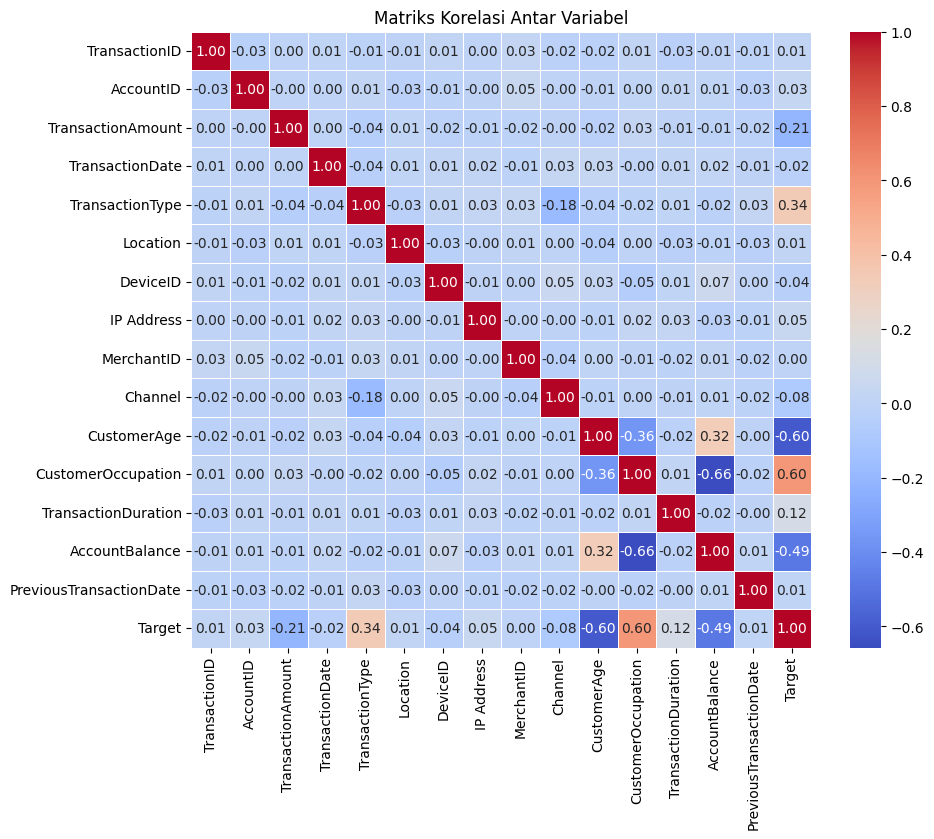

In [8]:
# Hapus fitur Login Attempts
df.drop(columns=['LoginAttempts'], inplace=True)

# Hitung matriks korelasi
corr_matrix = df.corr()

# Plot matriks korelasi menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

In [9]:
print(df['Target'].value_counts())

Target
1.0    1021
2.0     612
0.0     591
Name: count, dtype: int64


# **Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [10]:
# Pilih fitur (X) dan target (y)

# Drop rows where 'Target' is not a finite number (removes NaNs or inf)
df.dropna(subset=['Target'], inplace=True)

X = df[['TransactionAmount', 'TransactionType', 'CustomerOccupation', 'Channel', 'CustomerAge', 'AccountBalance']]
y = df['Target'].astype(int)

# (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1779, 6)
Testing set size: (445, 6)


# **Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.

1.   Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
Latih model menggunakan data latih.


In [11]:
# Model Logistic Regression
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [12]:
# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Model Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Get predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

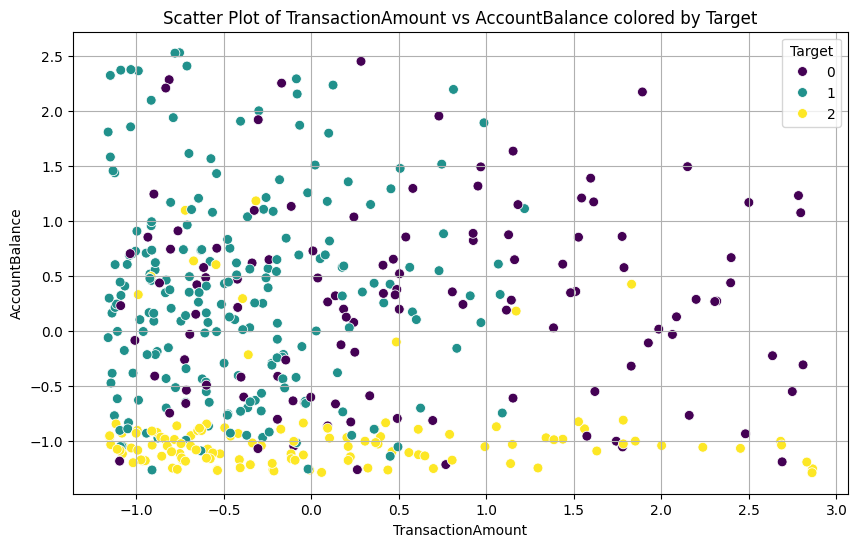

In [15]:
# Plot the result Decision Tree Classifier
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for better visualization

plt.figure(figsize=(10, 6))

# Choose two features to plot. Replace 'TransactionAmount' and 'AccountBalance'
# with any two columns from your X DataFrame you wish to visualize.
feature1 = 'TransactionAmount'
feature2 = 'AccountBalance'

# Use seaborn's scatterplot for easy coloring by the target variable 'Cluster'
# Combine X and y back into a single DataFrame for seaborn plotting
plot_df = X_test.copy()
plot_df['Target'] = y_test

sns.scatterplot(data=plot_df, x=feature1, y=feature2, hue='Target', palette='viridis', s=50)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f"Scatter Plot of {feature1} vs {feature2} colored by Target")
plt.legend(title='Target')
plt.grid(True)
plt.show()

# The lines below are removed as they were causing errors and were not
# appropriate for visualizing a classification result.
# plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)

In [16]:
# Simpan model decision tree
import joblib
joblib.dump(dt_model, 'decision_tree_model.h5')

['decision_tree_model.h5']


2.   Evaluasi Model Klasifikasi



In [17]:
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

Evaluasi Logistic Regression:
Akurasi: 0.952808988764045
F1-Score: 0.9520597976341856
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       118
           1       0.94      0.97      0.95       204
           2       1.00      0.98      0.99       123

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



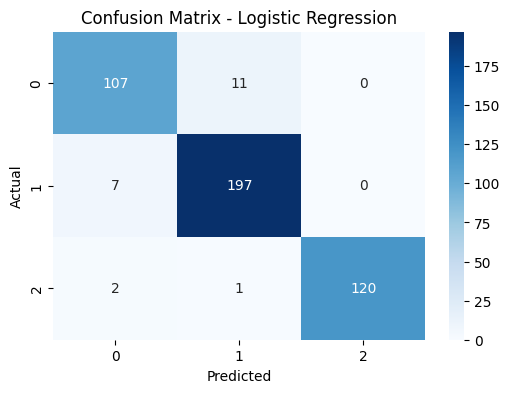

In [18]:
print("Evaluasi Logistic Regression:")
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Evaluasi Random Forest:
Akurasi: 0.950561797752809
F1-Score: 0.948950727488481
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       118
           1       0.94      0.97      0.95       204
           2       0.98      0.98      0.98       123

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



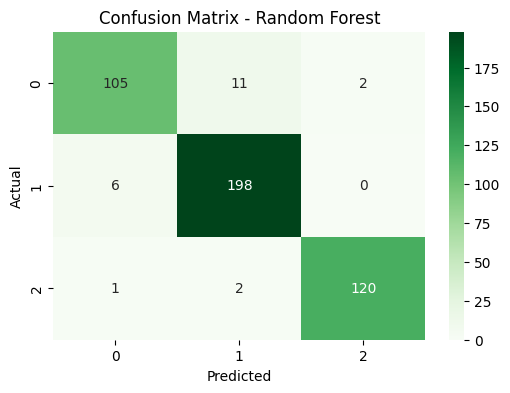

In [19]:
print("Evaluasi Random Forest:")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

3.  Tuning Model Klasifikasi (Optional)



In [20]:
# Hyperparameter tuning untuk Logistic Regression
logreg_params = {
    'solver': ['lbfgs', 'saga'],
    'C': [0.1, 1, 10],
    'max_iter': [200, 500, 1000]
}

grid_logreg = GridSearchCV(LogisticRegression(multi_class='multinomial', random_state=42),
                            param_grid=logreg_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_logreg.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", grid_logreg.best_params_)
print("Best Logistic Regression Accuracy:", grid_logreg.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Logistic Regression Parameters: {'C': 10, 'max_iter': 200, 'solver': 'lbfgs'}
Best Logistic Regression Accuracy: 0.9376008862161734


In [21]:
# Simpan model tuning ke CSV
tuning_df = pd.DataFrame(grid_logreg.cv_results_)
tuning_df.to_csv('tuning_lr_classification.h5', index=False)

In [22]:
# Hyperparameter tuning untuk Random Forest

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                        param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Random Forest Accuracy:", grid_rf.best_score_)

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest Accuracy: 0.9252413356543757


# **Evaluasi Model Klasifikasi Setelah Tuning (Optional)**

Evaluasi Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       118
           1       0.94      0.97      0.95       204
           2       1.00      0.98      0.99       123

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445

Akurasi: 0.952808988764045
F1-Score: 0.9520597976341856


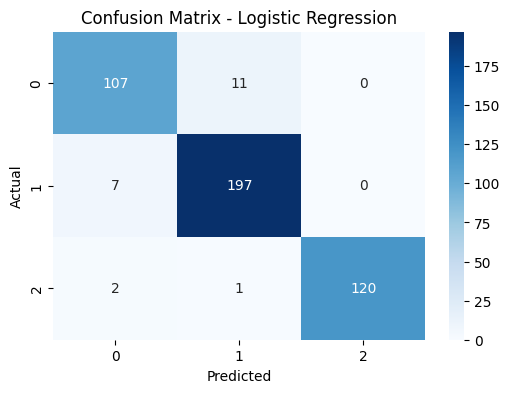

In [23]:
best_logreg_model = LogisticRegression(C=10, max_iter=200, solver='lbfgs', random_state=42)
best_logreg_model.fit(X_train, y_train)

print("Evaluasi Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg, average='macro'))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Evaluasi Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       118
           1       0.94      0.97      0.95       204
           2       0.98      0.98      0.98       123

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445

Akurasi: 0.950561797752809
F1-Score: 0.948950727488481


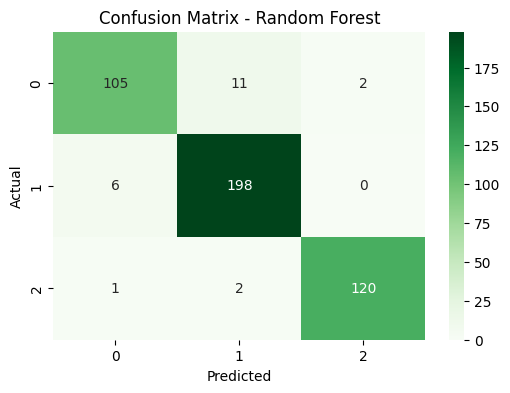

In [24]:
# Melatih ulang Random Forest dengan parameter terbaik
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

print("\nEvaluasi Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='macro'))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
!pip install joblib

import joblib

# Simpan model klasifikasi setelah tuning
# Gunakan joblib.dump() untuk menyimpan model scikit-learn
joblib.dump(best_logreg_model, 'tuning_lr_classification.h5')
joblib.dump(best_rf_model, 'tuning_rf_classification.h5')

# Komentar baris yang menyebabkan error
# best_logreg_model.to_csv('tuning_classification.h5', index=False)
# best_rf_model.to_csv('data_clustering_inverse.csv', index=False)

print("Models saved successfully using joblib.")

Models saved successfully using joblib.


In [26]:
# Simpan model klasifikasi setelah tuning ke CSV
tuning_df = pd.DataFrame(grid_logreg.cv_results_)
tuning_df.to_csv('data_classification.csv', index=False)

# **Analisis Hasil Evaluasi Model Klasifikasi**

Dalam analisis ini, evaluasi model klasifikasi bertujuan membangun model klasifikasi untuk menilai seberapa baik model yang dibangun dapat memprediksi atau mengklasifikasikan data. Ini melibatkan berbagai metrik dan teknik untuk mengukur performa model serta memastikan bahwa ia bekerja dengan baik pada data yang belum pernah dilihat sebelumnya



Ada beberapa matrik atau metode yang digunakan dalam evaluasi model klasifikasi; Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).

**Confusion Matrix - Logistic Regression**

*   Accuracy : 0.95
*   F1-Score : 0.95
*   Recall : 0.91
*   Precision : 0.92



**Analisis :** Menunjukkan akurasi 95%. Precision-nya adalah 92%, recall 91%, dan F1-Score 95%. Meskipun precision dan recall memiliki nilai yang hampir sama. Akurasi dan F1-Score memiliki nilai yang sama artinya model ini sangat baik untuk digunakan dan efektif.

**Random Forest**

*   Accuracy : 0.95
*   F1-Score : 0.94
*   Recall : 0.89
*   Precision : 0.94

**Analisis :** Tampil dengan akurasi tertinggi sebesar 95%. Model ini memiliki precision 94%, recall 89%, dan F1-Score 94%. Tingginya precision menunjukkan model ini sangat baik dalam mengidentifikasi jumlah transaksi dan tipe transaksi bank dengan benar dan F1-Score yang baik menunjukkan keseimbangan yang baik antara precision dan recall.